In [ ]:
!pip install optuna

# The Caravan Insurance Challenge

#### Data

It contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data derived from zip area codes.

In [1]:
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, f1_score
from lightgbm import LGBMClassifier

from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced

import itertools
import scipy.stats as ss

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier as rf
import os

In [2]:
RS = 404 # Random state

In [3]:
df = pd.read_csv('C:/Users/bhoom/Desktop/Projects/Caravan Insurance Challenge/caravan-insurance-challenge.csv')
df.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### EDA

In [4]:
df.shape

(9822, 87)

In [5]:
df.columns

Index(['ORIGIN', 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',
       'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV',
       'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG',
       'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO',
       'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1',
       'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045',
       'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART',
       'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT',
       'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG',
       'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS',
       'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT',
       'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT',
       'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND',
       'AZEILPL', 'APLEZIER',

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ORIGIN    9822 non-null   object
 1   MOSTYPE   9822 non-null   int64 
 2   MAANTHUI  9822 non-null   int64 
 3   MGEMOMV   9822 non-null   int64 
 4   MGEMLEEF  9822 non-null   int64 
 5   MOSHOOFD  9822 non-null   int64 
 6   MGODRK    9822 non-null   int64 
 7   MGODPR    9822 non-null   int64 
 8   MGODOV    9822 non-null   int64 
 9   MGODGE    9822 non-null   int64 
 10  MRELGE    9822 non-null   int64 
 11  MRELSA    9822 non-null   int64 
 12  MRELOV    9822 non-null   int64 
 13  MFALLEEN  9822 non-null   int64 
 14  MFGEKIND  9822 non-null   int64 
 15  MFWEKIND  9822 non-null   int64 
 16  MOPLHOOG  9822 non-null   int64 
 17  MOPLMIDD  9822 non-null   int64 
 18  MOPLLAAG  9822 non-null   int64 
 19  MBERHOOG  9822 non-null   int64 
 20  MBERZELF  9822 non-null   int64 
 21  MBERBOER  9822

In [7]:
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,0.873142,2.286602,1.887294,3.237324,4.302891,1.484525,3.307269,4.592038,1.898799,0.403278,0.545714,2.877113,2.226532,2.291183,1.650682,1.595093,2.204744,3.742211,1.068214,4.187742,4.819487,6.022501,1.335980,1.956730,6.254327,2.750662,2.577072,3.505498,2.739462,0.808491,0.208002,3.80452,4.260334,0.764915,0.038892,0.073712,2.956424,0.054877,0.170841,0.008858,0.019344,0.093565,0.011505,0.215027,0.202301,0.011505,0.018733,0.023315,1.849420,0.001629,0.015272,0.025351,0.016697,0.045408,0.400020,0.014050,0.021279,0.557218,0.011098,0.040216,0.002240,0.011403,0.034413,0.005192,0.071065,0.079821,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,0.961955,1.710674,1.779238,1.609139,1.984152,1.645968,1.723377,2.279839,1.814406,0.786792,1.106349,1.846703,1.748025,1.684008,1.742410,1.321487,1.534163,1.944900,1.298229,3.093127,3.093541,1.543980,1.213627,1.596842,2.000374,2.002960,2.073125,1.871365,1.950625,1.173771,0.561832,1.33093,1.998913,0.956555,0.356924,0.507818,2.921736,0.566108,0.888518,0.237556,0.200885,0.604350,0.215408,0.810899,0.910574,0.188699,0.213712,0.375350,1.881271,0.057058,0.244210,0.157198,0.211487,0.396983,0.492001,0.126058,0.144319,0.608575,0.129928,0.223622,0.068402,0.116251,0.249706,0.109954,0.267432,0.384431,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [8]:
df.ORIGIN.value_counts()

train    5822
test     4000
Name: ORIGIN, dtype: int64

In [9]:
# Any variable with levels less than 7 would be a categorical feature
min(df.nunique())
max(df.nunique())

df_cat = df.nunique() < 7
len(df_cat[df_cat])

37

In [10]:
#Collect numerical columns
num_columns = list(df_cat[df_cat == False].index)

len(num_columns)

50

In [11]:
# Collect categorical columns
cat_columns = list(df_cat[df_cat].index)

len(cat_columns)

37

In [12]:
# 4.1 Create a Class for using RandomScaler for numeric columns and 
# OneHotEncoder for Categorical Columns

ct = ColumnTransformer(
                        [
                            ('abc', RobustScaler(), num_columns),
                            ('cde', OneHotEncoder(handle_unknown='ignore'), cat_columns),
                            
                        ], remainder = 'passthrough')
ct.fit_transform(df)

array([[ 0.12,  0.  ,  0.2 , ...,  0.  ,  1.  ,  0.  ],
       [ 0.28,  0.  ,  0.2 , ...,  0.  ,  1.  ,  0.  ],
       [ 0.28,  0.  ,  0.2 , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [ 0.24,  0.  ,  0.2 , ...,  0.  ,  1.  ,  0.  ],
       [ 0.12,  0.  ,  0.2 , ...,  0.  ,  1.  ,  0.  ],
       [-0.88,  0.  , -1.  , ...,  0.  ,  1.  ,  0.  ]])

No NA values, all variables are type of int64. The data is peculiar in that every numeric value stands for an attribute of a person. Even variables that could be continuous, such as income, have been binned. In this sense, this dataset is entirely comprised of Categorical and Ordinal values. Other than potential collinearity between percentage and range values, the data is mostly clean.

#### Visualisation

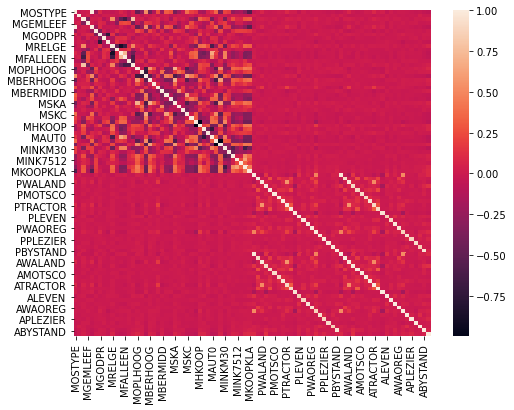

In [13]:
plt.subplots(figsize=(8,6))
sns.heatmap(df.drop(columns=['ORIGIN']).corr());

A correlation plot reveals some rather interesting pattens in the data. There is a clear divide between the two groupings listed in the description file with keys L3 and L4

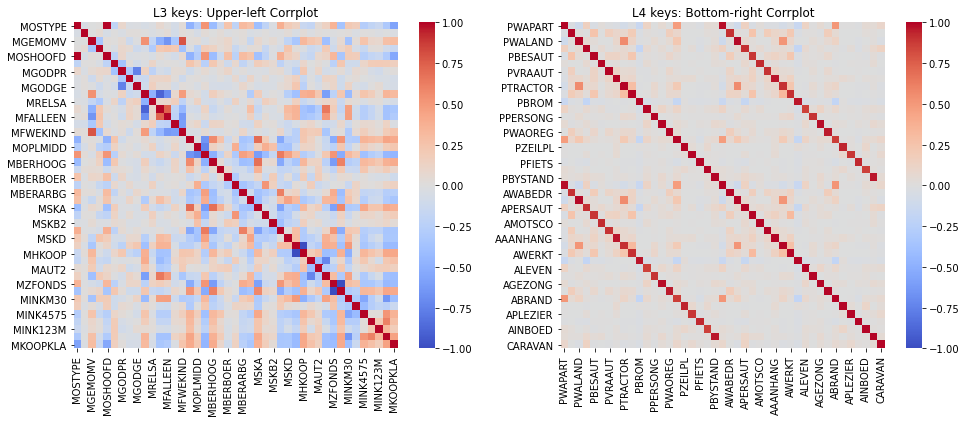

In [14]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

sns.heatmap(df.drop(columns=['ORIGIN']).iloc[:,:43].corr(), vmin=-1, vmax=1, cmap='coolwarm',ax=axes[0])
sns.heatmap(df.drop(columns=['ORIGIN']).iloc[:,43:].corr(), vmin=-1, vmax=1, cmap='coolwarm',ax=axes[1])
axes[0].set_title("L3 keys: Upper-left Corrplot")
axes[1].set_title("L4 keys: Bottom-right Corrplot");

The L4 keys plot (right) shows how variables starting with P each have a corresponding variable starting with A this means that having both in our data will likely provide little value.

In [15]:
# To see a numeric representation of the heatmaps
df.loc[:,(df.columns.str.startswith('P') | df.columns.str.startswith('A'))].corr()

,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
PWAPART,1.000000,-0.029882,-0.108959,0.155327,-0.037473,0.030606,-0.013688,-0.024552,-0.072032,-0.018005,-0.146039,0.127319,-0.007015,0.059400,-0.007137,0.482441,0.007017,0.007525,-0.021306,0.047592,0.040180,0.981097,-0.030871,-0.109064,0.142836,-0.036356,0.030398,-0.016851,-0.022590,-0.070142,-0.020341,-0.140869,0.132164,0.002488,0.061563,-0.006167,0.508743,0.003925,0.005124,-0.010366,0.053440,0.040662
PWABEDR,-0.029882,1.000000,0.021820,-0.001109,0.256518,-0.005542,0.158056,0.100274,0.080841,0.187537,-0.023620,0.022157,0.005450,-0.009553,0.169558,0.098494,-0.003111,-0.006815,-0.004871,0.023770,0.019154,-0.032359,0.906663,0.023467,0.010848,0.251977,-0.004290,0.179939,0.102194,0.078663,0.212793,-0.023625,0.010766,0.009504,-0.009750,0.177704,0.056280,-0.003300,-0.007113,-0.002753,0.027010,0.016261
PWALAND,-0.108959,0.021820,1.000000,0.065233,0.034806,-0.005797,-0.005413,0.092821,0.566762,0.118841,-0.010801,0.000338,0.062343,0.008854,0.061496,0.221693,-0.004145,-0.006615,-0.019585,-0.007669,0.031883,-0.109879,0.021995,0.984484,0.076957,0.024638,-0.002794,-0.004754,0.085799,0.522009,0.098912,-0.002587,-0.003020,0.043593,0.009601,0.064480,0.132330,-0.004396,-0.001763,-0.018967,-0.004584,0.022099
PPERSAUT,0.155327,-0.001109,0.065233,1.000000,0.011480,0.067115,0.003344,0.045501,0.077793,0.025388,-0.180287,0.065507,0.011067,0.046967,0.005847,0.087132,-0.003239,0.031329,-0.037943,0.025731,0.077028,0.145648,-0.011331,0.065950,0.907506,0.016831,0.065799,0.007112,0.044632,0.069884,0.023525,-0.174957,0.066101,0.014429,0.044129,0.005789,0.017118,-0.009914,0.034932,-0.027260,0.020168,0.083753
PBESAUT,-0.037473,0.256518,0.034806,0.011480,1.000000,0.015368,0.123585,0.120491,0.082013,0.228620,-0.025708,0.018757,0.005527,0.018434,0.097483,0.033383,-0.002768,-0.006063,0.004961,-0.007654,0.039203,-0.038975,0.183245,0.035558,0.033592,0.894309,0.011521,0.091488,0.131287,0.083160,0.234250,-0.025762,0.030401,0.009403,0.017669,0.085092,0.004360,-0.002936,-0.006327,0.006059,-0.008843,0.035959
PMOTSCO,0.030606,-0.005542,-0.005797,0.067115,0.015368,1.000000,0.010196,0.031113,-0.001707,0.002498,-0.035305,0.048018,0.013783,-0.008277,-0.000953,0.008386,-0.005490,0.008622,-0.000393,-0.000010,0.036894,0.025101,-0.005069,-0.004531,0.080593,0.008272,0.923728,0.003755,0.035356,0.000117,-0.002827,-0.036101,0.030126,0.020892,-0.006876,-0.001891,-0.012292,-0.005823,0.010958,0.004500,0.004725,0.053310
PVRAAUT,-0.013688,0.158056,-0.005413,0.003344,0.123585,0.010196,1.000000,0.115895,0.056639,0.069642,-0.009888,-0.008285,0.029527,-0.003269,0.086754,0.018478,-0.001065,-0.002332,0.010346,-0.002944,-0.004265,-0.014637,0.114852,-0.005498,0.028540,0.128773,0.004794,0.901122,0.110642,0.048073,0.045018,-0.009909,-0.007743,0.041897,-0.003336,0.075995,0.006919,-0.001129,-0.002434,0.006690,-0.003401,-0.004386
PAANHANG,-0.024552,0.100274,0.092821,0.045501,0.120491,0.031113,0.115895,1.000000,0.084057,0.096038,-0.005535,-0.010820,0.004873,-0.003698,0.034530,0.045429,0.050551,0.060395,-0.002634,0.016364,0.022181,-0.023699,0.077727,0.094677,0.066737,0.136118,0.030280,0.107999,0.962867,0.071982,0.133747,-0.006638,-0.006811,0.008477,-0.002906,0.029801,0.028842,0.064089,0.032706,-0.004794,0.024042,0.018811
PTRACTOR,-0.072032,0.080841,0.566762,0.077793,0.082013,-0.001707,0.056639,0.084057,1.000000,0.290514,-0.008438,-0.004425,0.082525,0.006137,0.079258,0.207092,-0.004420,-0.003474,-0.013181,-0.009835,0.030247,-0.074180,0.076301,0.566723,0.096043,0.072360,0.002292,0.071287,0.071771,0.913831,0.239388,-0.003974,-0.010236,0.059349,0.005128,0.075863,0.112414,-0.004689,-0.003625,-0.014434,-0.008667,0.020429
PWERKT,-0.018005,0.187537,0.118841,0.025388,0.228620,0.

In [16]:
df.CARAVAN.dtype

dtype('int64')

C:\Users\bhoom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CARAVAN', ylabel='count'>

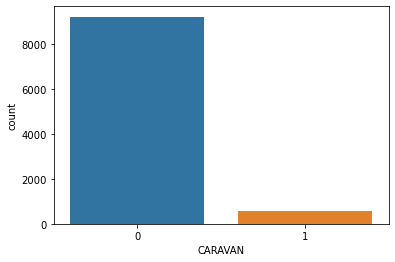

In [17]:
fig = sns.countplot(df.CARAVAN)
fig

### Modelling

To identify the potential purchasers classification techniques can be used and then we can tune hyper-parameters to maximize the accuracy. Here as data is quite imbalanced, we can utilise over-sampling or under-sampling techniques. As we are working with unbalanced data, LightGBM Model will be run against a training dataset in 4 different states: <br>

Unbalanced (No modifications)<br>
Undersampled<br>
Oversampled<br>
SMOTE<br>

### Helper

This function prints and plots the confusion matrix.Normalization can be applied by setting 'normalize=True'.


In [18]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, cf_report=False,
                          title='Confusion matrix', ax=None, cmap=plt.cm.Blues, cbar=False):

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    if cf_report:
        print(classification_report(y_true,y_pred))
    
    fig, ax = (plt.gcf(), ax) if ax is not None else plt.subplots(1,1)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    
    if cbar:
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04) # "Magic" numbers (https://stackoverflow.com/a/26720422/10939610)
    
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

Plot ROC curve

In [19]:
def plot_roc(y_true, y_pred, ax=None):
   
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_true, y_pred)
    roc_score = roc_auc_score(y_true,y_pred)
    
    fig, ax = (plt.gcf(), ax) if ax is not None else plt.subplots(1,1)

    ax.set_title("Receiver Operating Characteristic")
    ax.plot(false_positive_rate, true_positive_rate)
    ax.plot([0, 1], ls="--")
    ax.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    ax.annotate('ROC: {:.5f}'.format(roc_score), [0.75,0.05])
    ax.set_ylabel("True Positive Rate")
    ax.set_xlabel("False Positive Rate")
    fig.tight_layout()
    return roc_score

Dataframe containing each feature with its corresponding importance in the given model <br>
Args <br>
model : model, classifier that supports .feature_importances_ (RandomForest, AdaBoost, ect..) <br>
X_train : array like, training data object <br>
plot : boolean, if True, plots the data in the form of a bargraph <br>
n : int, only applicable if plot=True, number of features to plot, (default=15) <br>
Returns<br>
pandas DataFrame : columns = feature name, importance

In [20]:
def feat_imps(model, X_train, plot=False, n=None):

    
    fi_df = pd.DataFrame({'feature':X_train.columns,
                          'importance':model.feature_importances_}
                        ).sort_values(by='importance', ascending=False)
    if plot:
        fi_df[:(n if n is not None else 15)].plot.bar(x='feature',y='importance')
    else:
        return fi_df

Convenience function to plot confusion matrix and ROC curve 

In [21]:
def plot_cmroc(y_true, y_pred, classes=[0,1], normalize=True, cf_report=False):

    fig,axes = plt.subplots(1,2, figsize=(9,4))
    plot_confusion_matrix(y_true, y_pred, classes=classes, normalize=normalize, cf_report=cf_report, ax=axes[0])
    roc_score = plot_roc(y_true, y_pred, ax=axes[1])
    fig.tight_layout()
    plt.show()
    return roc_score

In [22]:
train_df = df.query("ORIGIN=='train'").iloc[:,1:].copy()
test_df = df.query("ORIGIN=='test'").iloc[:,1:].copy()

The test data will be treated as a holdout test set, so we will split train_df into a training validation set. This more closely resembles how the actual competition would have been set up.

In [24]:
X, y = train_df.drop(columns='CARAVAN'), train_df.CARAVAN
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=RS)
X_test,y_test= test_df.drop(columns='CARAVAN'), test_df.CARAVAN

To address the issue with imbalanced data, we will compare three approaches for each model used: <br>

<b>Random Over Sampling </b> - attempts to balance the data by randomly selecting from the minority class, in this case, those who did purchase a caravan insurance policy.<br>

<b>Random Under Sampling</b> - balances data by randomly under under selecting from the majority class, those who did not purchase caravan insurance.<br>

<b>SMOTE </b> - Synthetic Minority Over-sampling Technique, constructs new synthetic data by sampling neighboring points. Balancing happens through both oversampling the minority and undersampling the major class

In [25]:
ros = RandomOverSampler(random_state=RS)
rus = RandomUnderSampler(random_state=RS)
smt = SMOTE(random_state=RS, n_jobs=-1)

In [26]:
X_under, y_under = rus.fit_sample(X_train,y_train)
X_over, y_over = ros.fit_sample(X_train,y_train)
X_smote, y_smote = smt.fit_sample(X_train,y_train)

In [27]:
pd.DataFrame([*map(lambda x: ss.describe(x)._asdict(),[y_train,y_under,y_over,y_smote])], 
             index=['Unbalanced','Undersample','Oversample','SMOTE'])

,nobs,minmax,mean,variance,skewness,kurtosis
Unbalanced,4657,"(0, 1)",0.059695,0.056144,3.716892,11.815283
Undersample,556,"(0, 1)",0.500000,0.250450,0.000000,-2.000000
Oversample,8758,"(0, 1)",0.500000,0.250029,0.000000,-2.000000
SMOTE,8758,"(0, 1)",0.500000,0.250029,0.000000,-2.000000


In [28]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm

LGBMClassifier()

### Unbalanced Data

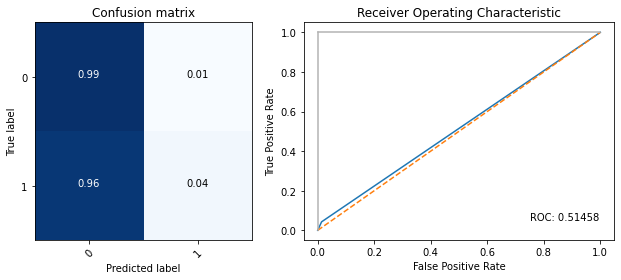

In [29]:
lgbm_unbal = plot_cmroc(y_val, lgbm.fit(X_train, y_train).predict(X_val))

In [30]:
y_pred=lgbm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9337


### Underfitting

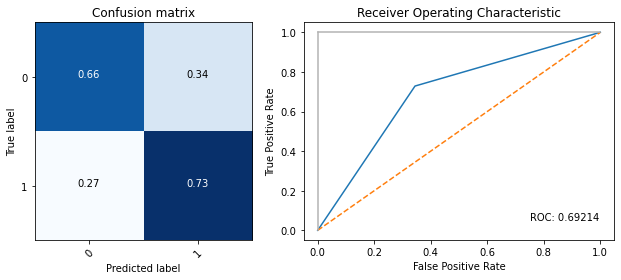

In [31]:
lgbm_under = plot_cmroc(y_val, lgbm.fit(X_under, y_under).predict(X_val))

In [32]:
y_pred=lgbm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.6345


### Overfitting

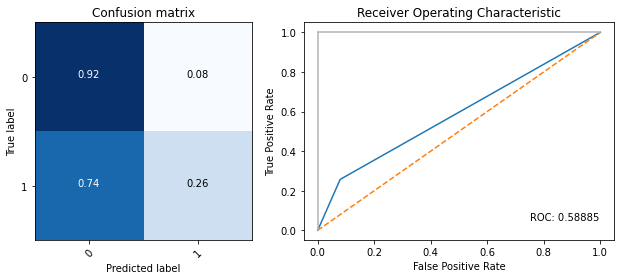

In [33]:
lgbm_over = plot_cmroc(y_val, lgbm.fit(X_over, y_over).predict(X_val))

In [34]:
y_pred=lgbm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.8685


### SMOTE

In [35]:
import optuna
from sklearn.metrics import mean_squared_error

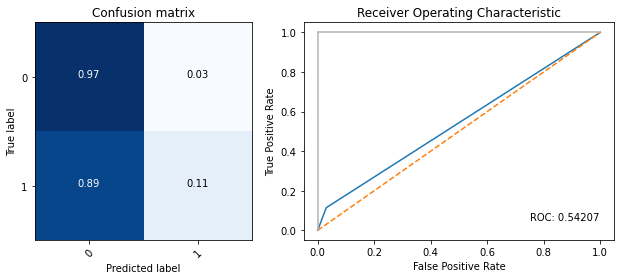

In [36]:
lgbm_smote = plot_cmroc(y_val, lgbm.fit(X_smote, y_smote).predict(X_val))

In [37]:
y_pred=lgbm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9255


In [38]:
def objective(trial,data=df.drop(columns='CARAVAN'),target=df.CARAVAN):
    
    param = {
        'metric': 'rmse', 
        'random_state': 48,
        'n_estimators': 20000,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
    }
    model = LGBMClassifier(**param)  
    
    model.fit(X_smote, y_smote,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, preds,squared=False)
    
    return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=40)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2021-08-25 23:11:52,362] A new study created in memory with name: no-name-2e2325a9-35bb-48bd-8dca-e7478713fd1c
[I 2021-08-25 23:14:21,371] Trial 0 finished with value: 0.2729468812791236 and parameters: {'reg_alpha': 0.3109976107779448, 'reg_lambda': 0.8803095269518522, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.006, 'max_depth': 100, 'num_leaves': 621, 'min_child_samples': 184, 'min_data_per_groups': 27}. Best is trial 0 with value: 0.2729468812791236.
[I 2021-08-25 23:15:14,447] Trial 1 finished with value: 0.27703790354390134 and parameters: {'reg_alpha': 1.4310153537047348, 'reg_lambda': 0.06350489075548581, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 411, 'min_child_samples': 281, 'min_data_per_groups': 7}. Best is trial 0 with value: 0.2729468812791236.
[I 2021-08-25 23:15:55,359] Trial 2 finished with value: 0.2765863337187866 and parameters: {'reg_alpha': 0.10763303311599777, 'reg_lambda': 0.0066611813

In [ ]:
study.trials_dataframe()

In [ ]:
params=study.best_params   
params['random_state'] = 48
params['n_estimators'] = 20000 
params['metric'] = 'rmse'

In [ ]:
lgbm.set_params(**study.best_params)
lgbm_unbal = plot_cmroc(y_val, lgbm.fit(X_smote, y_smote).predict(X_val))
lgbm

In [ ]:
y_pred=lgbm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

### Recommendation

In [ ]:
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
corr = df.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})    .set_caption("Hover to magify")    .set_precision(2)    .set_table_styles(magnify())

Removing features which are highly correlated. Here,threshold is 0.70

In [ ]:
dataset1 = df.drop(['MOSHOOFD','MFWEKIND','MRELOV','MGODPR','MRELOV','MOPLMIDD','MOPLHOOG','MAUT0','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND'],axis=1)

In [ ]:
dataset1.hist(figsize=(16,12));
plt.tight_layout
fig.show()

Removing Features with Single class. Because they dont have much impact on result.

In [ ]:
dataset2 = dataset1.drop(['ABESAUT', 'AGEZONG', 'AINBOED', 'APERSONG', 'APLEZIER', 'AVRAAUT', 'AWAOREG', 'AWERKT', 'AZEILPL'],axis=1)
dataset2.head()

In [ ]:
dataset2.drop('ORIGIN',axis=1,inplace=True)

In [ ]:
dff = pd.get_dummies(data=dataset2, columns=['MOSTYPE'])
dff.head()

In [ ]:
user_similarity = pairwise_distances(dff, metric='cosine')
user_similarity.shape

In [ ]:
#List of Policies, which we can recommend.
policiescolumnlist = ['AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'AMOTSCO','AAANHANG', 'ATRACTOR','ABROM', 'ALEVEN','ABRAND','AFIETS', 'ABYSTAND', 'CARAVAN']

In [ ]:
user_index=0

#extracting the list of policies which current user doesn't have
availablecollist=[]
for item in policiescolumnlist:
    if dff.loc[user_index,item]==0:
        availablecollist.append(item)

Methodology:
Here,we are going to find top 10 similar users and will recommend product. accordingly.
We have fixed minimum number of policy 3. So if it doesn't get min 3 policy from top 10 similar users, Then it will go for next 10 similar users.
This code will check upto 200 similar user to get min no of products for recommendation.
But If it still does not able to find any product, then it will give msg "There are no products, as per top 200 similar people".

In [ ]:
no_of_policies=3 #you can set this variable value as min number of policies you want to recommend.
output=dict()
i=1
while i < 20:
    opdf=dff.iloc[user_similarity[user_index].argsort()[(i-1)*10:i*10], 35:48] #list of indexes of row
    tempoutput=dict(opdf[availablecollist].sum().sort_values()[opdf[availablecollist].sum().sort_values()>0])
    output.update(tempoutput)
    if len(output)>=no_of_policies:
        break
    i+=1
    if i>50:
        print("There are no products, as per top 200 similar people")
        break
output

Above 4 are the recommended products for user with index 0. And number mentioned in front of them can be taken as weightage for each product.
For e.g :- There are more chances that user will purchase 'AWAPART' product than other products.